---
### Aunalytics Assessment In Python // Problem Statement #2

By: Cody Culver // 
Date: 3/30/2022

---

#### Problem Statement
Perform a segmentation study on the
dataset to display useful information using
any visualization library.

#### Setting Up Analysis Environment
setting up the Python environment by loading the necessary packages and datasets.

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets
training_set = pd.read_csv('au_train.csv')
test_set = pd.read_csv('au_test.csv')

#### Data Cleaning and Exploration
Going through typical data investigations via overviews, null checks, metadata confirmation, trimming, and sanity checks. 

In [2]:
# combine training set with test set for total data set
dataset = pd.concat([training_set, test_set],ignore_index=True)

dataset.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# null check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
n=len(dataset['workclass'].unique())
print(n)

9


In [5]:
n=len(dataset['education'].unique())
print(n)

16


In [6]:
n=len(dataset['marital-status'].unique())
print(n)

7


In [7]:
n=len(dataset['occupation'].unique())
print(n)

15


In [8]:
n=len(dataset['relationship'].unique())
print(n)

6


In [9]:
n=len(dataset['race'].unique())
print(n)

5


In [10]:
n=len(dataset['sex'].unique())
print(n)

2


In [11]:
n=len(dataset['native-country'].unique())
print(n)

42


In [12]:
n=len(dataset['class'].unique())
print(n)

4


In [13]:
# Removing white spaces and extra characters of dataset
dataset['workclass'] = dataset['workclass'].str.strip()
dataset['education'] = dataset['education'].str.strip()
dataset['marital-status'] = dataset['marital-status'].str.strip()
dataset['occupation'] = dataset['occupation'].str.strip()
dataset['relationship'] = dataset['relationship'].str.strip()
dataset['race'] = dataset['race'].str.strip()
dataset['sex'] = dataset['sex'].str.strip()
dataset['native-country'] = dataset['native-country'].str.strip()
dataset['class'] = dataset['class'].str.strip()
dataset['class'] = dataset['class'].str.strip('.')

# Sanity checks
listcheck = dataset['class'].tolist()
print(listcheck[:10])
listcheck = dataset['workclass'].tolist()
print(listcheck[:10])
listcheck = dataset['relationship'].tolist()
print(listcheck[:10])

['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '>50K']
['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private', 'Private', 'Private', 'Self-emp-not-inc', 'Private', 'Private']
['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife', 'Wife', 'Not-in-family', 'Husband', 'Not-in-family', 'Husband']


#### Data Segmentation Visualizations
Data visualizations will be broken down into the following sections:
* Sex
* Age
* Hours Worked Per Week
* Salary Class

#### Sex Distributions

In [14]:
male = (dataset.sex == 'Male').sum()
female = (dataset.sex == 'Female').sum()

sex_counts = [male, female]
labels = ['Male','Female']

print(sex_counts)

[32650, 16192]


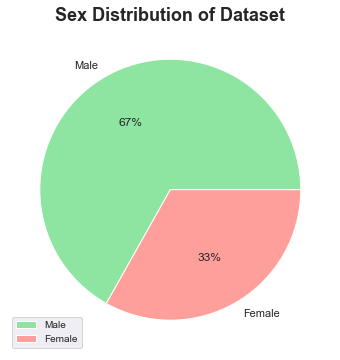

In [15]:
# Theme control
sns.set_theme(style = 'darkgrid')
colors = sns.color_palette('pastel')[2:10]


# Sex distribution
# ----------------------
# Sex distribution of dataset
plt.figure(figsize=(12,6))
plt.pie(sex_counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Sex Distribution of Dataset', fontsize=18, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

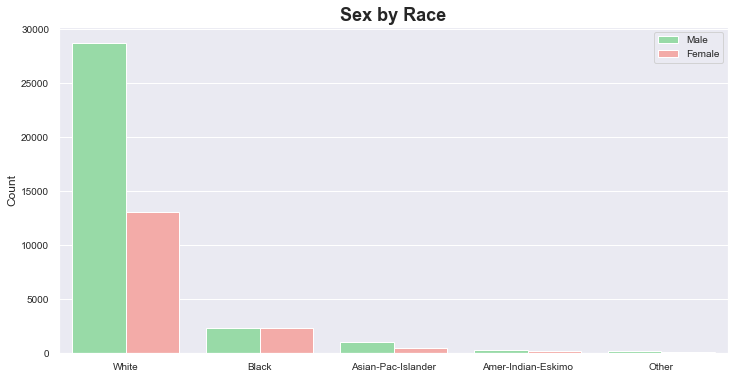

In [16]:
# Sex distribution by race
plt.figure(figsize=(12,6))
sns.countplot(x=dataset['race'], hue = dataset['sex'], palette=(colors), order = dataset['race'].value_counts(ascending=False).index)
plt.title('Sex by Race', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\4140230667.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


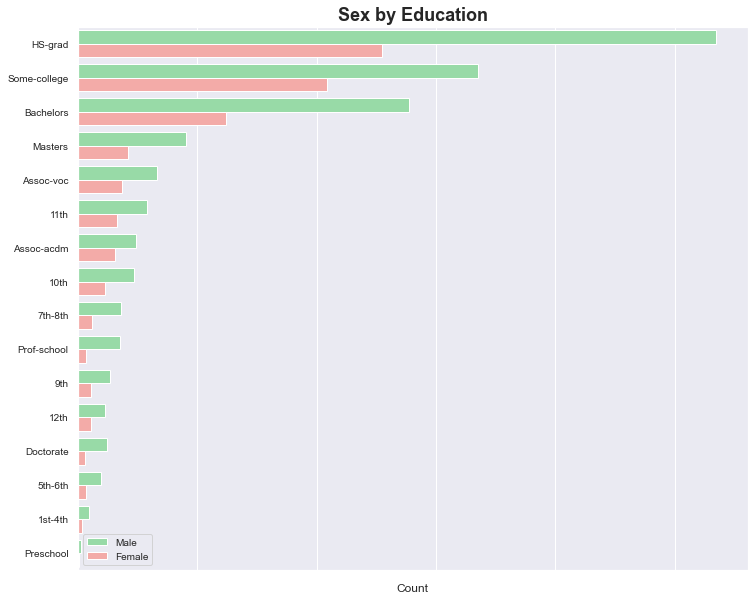

In [17]:
# Sex distribution by education
plt.figure(figsize=(12,10))
sd3 = sns.countplot(y=dataset['education'], hue = dataset['sex'], palette=(colors), order = dataset['education'].value_counts(ascending=False).index)
sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Sex by Education', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

Sex distrubtion is predominantly male. Interestingly, when broken down by race, most minority races have even sex distrubition, while white has more than double the male count over female count. For the most part, education distribution seems to have similar trends for both male and female. The trend of the top three values is similar to that reported by the National Center of Education Statistics in [Educational Attainment of Young Adults]('https://nces.ed.gov/programs/coe/pdf/coe_caa.pdf'). 

The difference between the amount of women recorded with high school level education and some college education is not large, but the same difference is significant for males. There is an interesting correlation between the data being predominantly white male and high school graduate education level. Looking at this article by Bookings [The Male College Crisis Is Not Just In Enrollment, But Completion]('https://www.brookings.edu/blog/up-front/2021/10/08/the-male-college-crisis-is-not-just-in-enrollment-but-completion/'), Figure 3 shows how the majority of all college level degrees are acquired by females. 

This collection of information supports that the sex distrubitions within the education and race variables are not heavily bias even though sex by itself is.

#### Age Distribution

<Figure size 864x432 with 0 Axes>

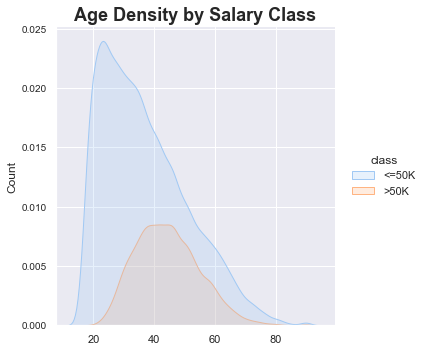

In [18]:
# Age density
plt.figure(figsize=(12,6));
sns.displot(data=dataset, palette='pastel', x='age', hue='class', kind='kde', fill=True)
plt.title('Age Density by Salary Class', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
_ = plt.yticks(fontsize=10)

The age data presents a right-skewed distrubition. However, the skew of the high income class is not nearly as significant as it is for the low income class. It seems that it is more difficult or abnormal for younger adults to acquire higher income. Said in other words, it makes sense that older adults have acquired more wealth through the collection of skills and experience.

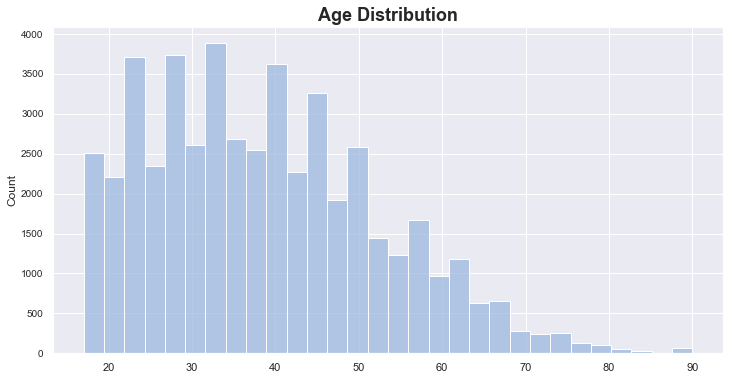

In [19]:
# Age distribution
plt.figure(figsize=(12,6))
sns.histplot(data=dataset, color='#9BB9DF', x='age', bins = 30)
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
_ = plt.yticks(fontsize=10)

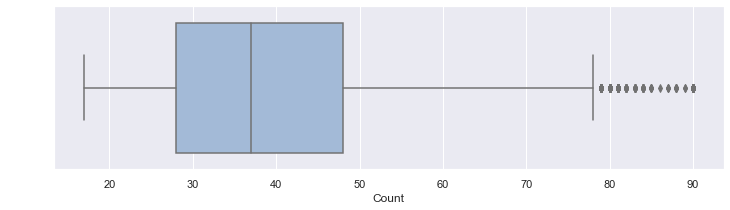

In [20]:
plt.figure(figsize=(12,3))
sns.boxplot(x=dataset['age'], color='#9BB9DF')
plt.xlabel('Count')
plt.ylabel(' \n\n')
_ = plt.yticks(fontsize=10)

Here we can see the interquartile range (IQR) with a value of 20 years, starting from age 28. Although the majority of age values are from about 30-50 years, the dominant education status is 'High School Graduate'.

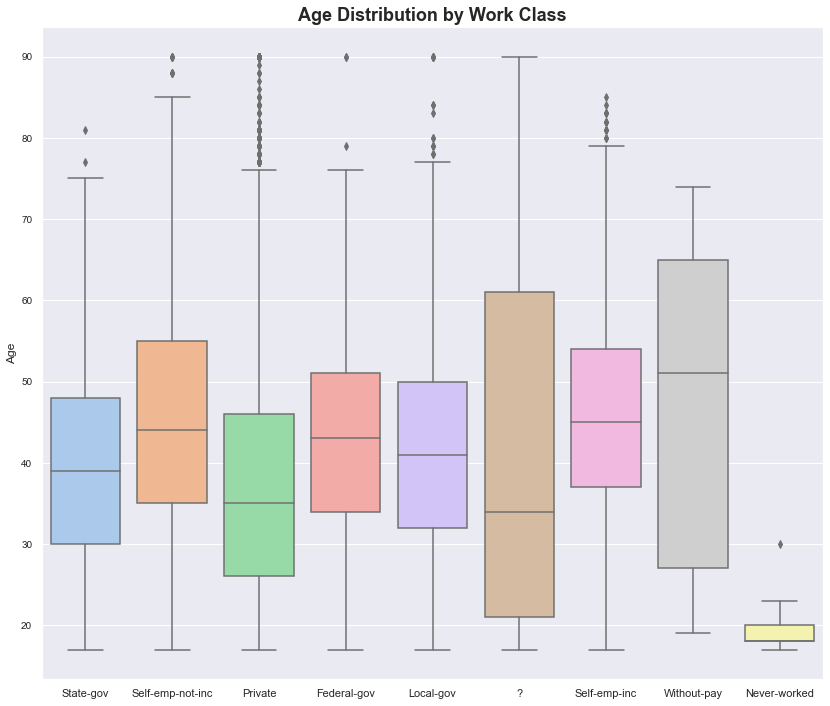

In [21]:
plt.figure(figsize=(14,12))
sns.boxplot(y=dataset['age'],x=dataset['workclass'], palette='pastel')
plt.title('Age Distribution by Work Class', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Age')
_ = plt.yticks(fontsize=10)

Breaking down age distribution by working class implies that unidentified working classes and working classes without pay cover a wider range of age variance than other working classes. The far opposite would be those who have never worked, which has an age distribution of all values below 15 years of age. In regards to the remainder of the listed working classes, most classes have similar median ages and IQRs, excluding the private class, which has a lower age distribution by about 5-10 years.

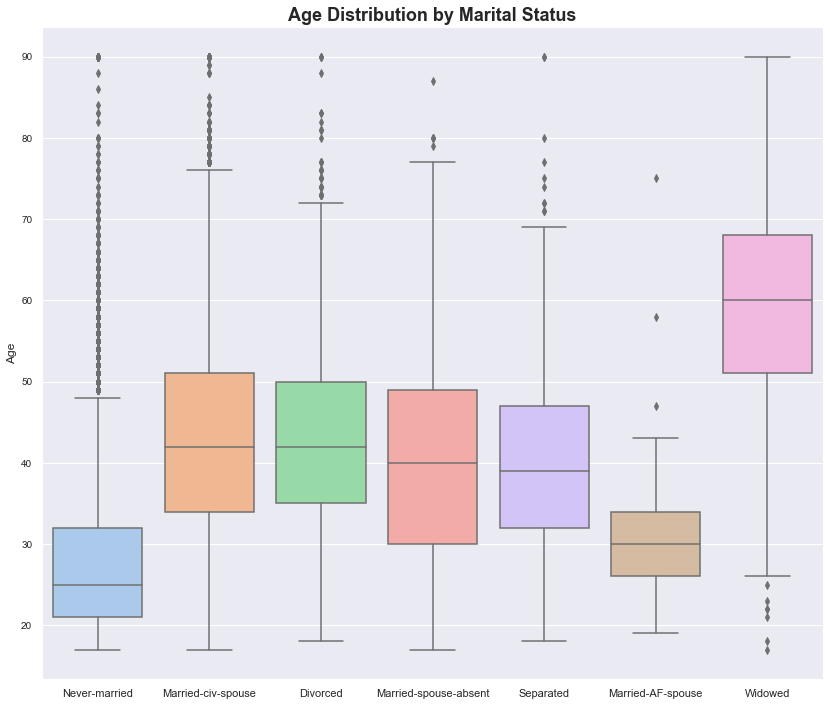

In [22]:
plt.figure(figsize=(14,12))
sns.boxplot(y=dataset['age'],x=dataset['marital-status'], palette='pastel')
plt.title('Age Distribution by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Age')
_ = plt.yticks(fontsize=10)

Age distribution by marital status implies  that of those who are married, spouses in the Armed Forces become married at a younger age, and are often married before the age of 20. The age distribution of divorced and married civilians are very similar, and the same is so for absent married individuals and seperated individuals. Individuals who are never married are generally the lowest age distribution, but it also has the highest outlier count. It makes sense that the age distrubtion of widowed individuals is significantly higher than all other marital status', with a median age roughly 18 years higher than runner up 'married civilians'.

#### Hours Worked Per Week

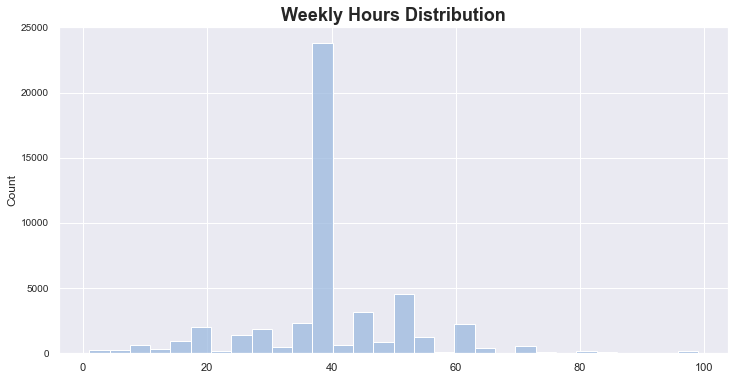

In [23]:
# Hours per week distribution
plt.figure(figsize=(12,6))
sns.histplot(data=dataset, color='#9BB9DF', x='hours-per-week', bins = 30)
plt.title('Weekly Hours Distribution', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
_ = plt.yticks(fontsize=10)

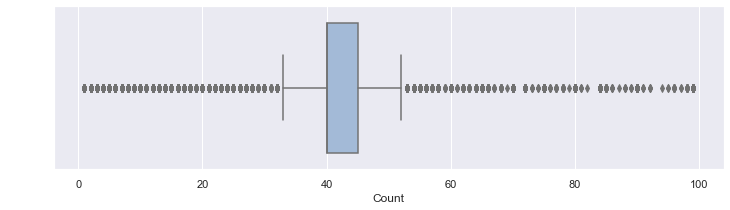

In [24]:
plt.figure(figsize=(12,3))
sns.boxplot(x=dataset['hours-per-week'], color='#9BB9DF')
plt.xlabel('Count')
plt.ylabel(' \n\n')
_ = plt.yticks(fontsize=10)

Worked hours per week is significantly centralized around 40-45 hours per week. In fact, any values above ~52 hours per week and below ~ 33 hours per week is considered numerically distant from the majority of the data and are outliers.

#### Salary Class

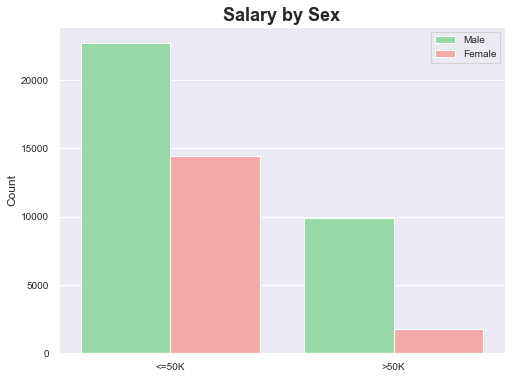

In [25]:
# Salary distribution by sex
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['class'], hue = dataset['sex'], palette=(colors), order = dataset['class'].value_counts(ascending=False).index)
plt.title('Salary by Sex', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

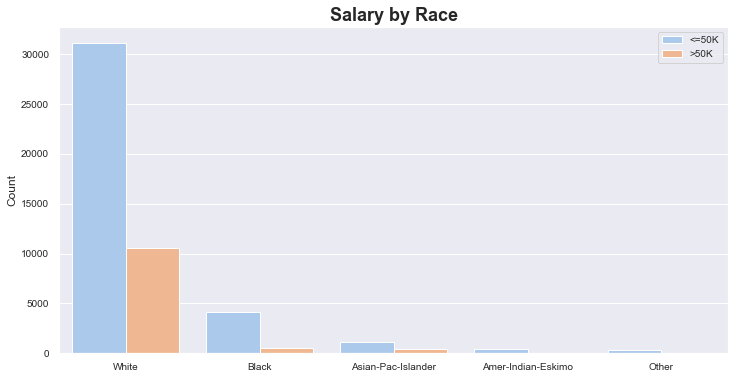

In [26]:
# Salary distribution by race
plt.figure(figsize=(12,6))
sns.countplot(x=dataset['race'], hue = dataset['class'], palette='pastel', order = dataset['race'].value_counts(ascending=False).index)
plt.title('Salary by Race', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\2673520856.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


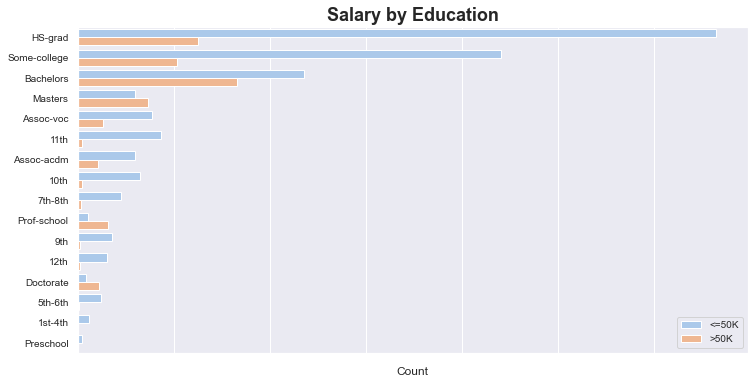

In [27]:
# Salary distribution by education
plt.figure(figsize=(12,6))
sd3 = sns.countplot(y=dataset['education'], hue = dataset['class'], palette='pastel', order = dataset['education'].value_counts(ascending=False).index)
sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Salary by Education', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

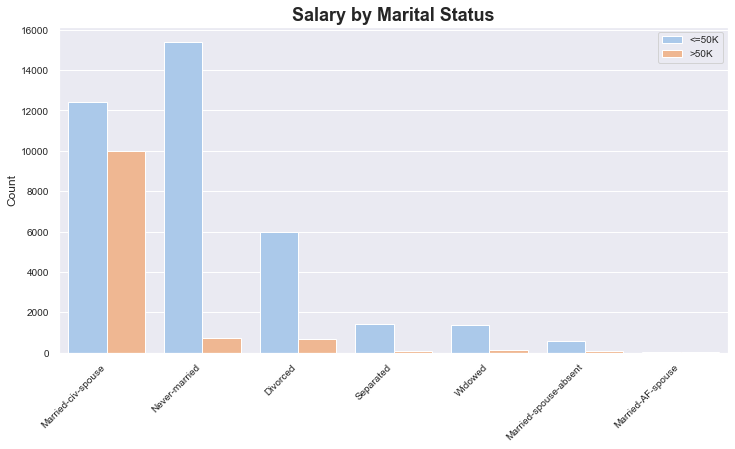

In [28]:
# Salary distribution by marital-status
plt.figure(figsize=(12,6))
sd3 = sns.countplot(x=dataset['marital-status'], hue = dataset['class'], palette='pastel', order = dataset['marital-status'].value_counts(ascending=False).index)
sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Salary by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

Males make up the mass majority of those who achieve a salary greater than \\$50,000. Within all races, a larger proportion of individuals make less than \\$50,000 a year.

A large proportion of salaries are less than \\$50,000 per year up until a Bachelor's degree is acquired. For those who have a Bachelor's degree, \\$50k and below per year is still the majority salary range, but the difference between those above and below \\$50k is small. Educational degrees above Bachelor's have a higher proportion of salaries above \\$50k than below.

Salary class by marital status implies that the two wealthiest marital status categories are never-married and married civilians. This coordinates well with the age distribution by marital status box plot from earlier. The two marital status categories with the highest median ages are never-married and married civilians.

C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\3845141122.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


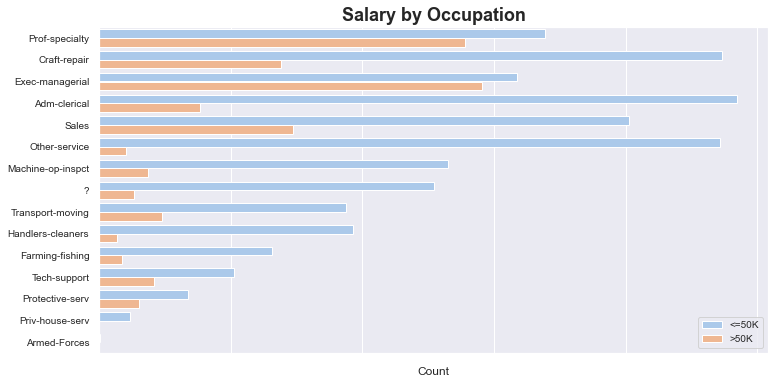

In [29]:
# Salary distribution by occupation
plt.figure(figsize=(12,6))
sd3 = sns.countplot(y=dataset['occupation'], hue = dataset['class'], palette='pastel', order = dataset['occupation'].value_counts(ascending=False).index)
sd3.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Salary by Occupation', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

Looking at the income class distribution based on occupation, proffesional related fields and executive/management positions have the highest upper income class population. Craftsmanship and sales occupations are the next region of higher income class population, although said income class population is not a majority of the salary class distribution in these two occupations. The most popular occupations are in the fields of craftsmanship/repair, administration/clerical, and sales.

If one was to use this data to help decide what is the best occupation group to go into that has the lowest compeition with a reasonable chance of acquiring a salary about \\$50k, they could start researching how to use their specialty skills for a niche market or look into acquiring a mangerial position.

C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\2725988784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_nc_class.rename(columns = {'native-country':'nc'}, inplace = True)
C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\2725988784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_nc_class.rename(columns = {'class':'cl'}, inplace = True)


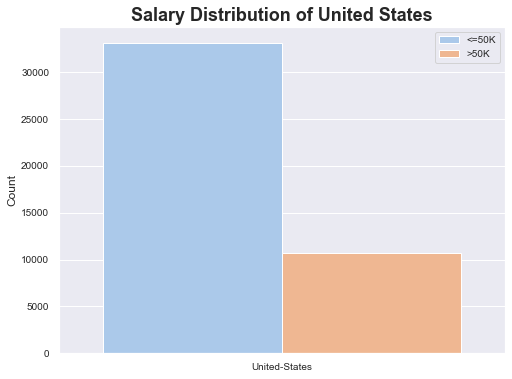

In [30]:
# Salary distribution by country
#--------------------------------

# Huge proportion of country data is recorded as United States, 
# so that will be removed from the rest of the native countries to not dwarf them when plotting.
# Income class by country
dataset_nc_class = dataset[['native-country','class']]
dataset_nc_class.rename(columns = {'native-country':'nc'}, inplace = True)
dataset_nc_class.rename(columns = {'class':'cl'}, inplace = True)
dataset_us_class = dataset_nc_class.loc[dataset_nc_class['nc'] == 'United-States']

plt.figure(figsize=(8,6))
cl6 = sns.countplot(x=dataset_us_class['nc'], hue = dataset_us_class['cl'], palette='pastel')
plt.title('Salary Distribution of United States', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\clcul\AppData\Local\Temp\ipykernel_27684\2046794735.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cl7.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


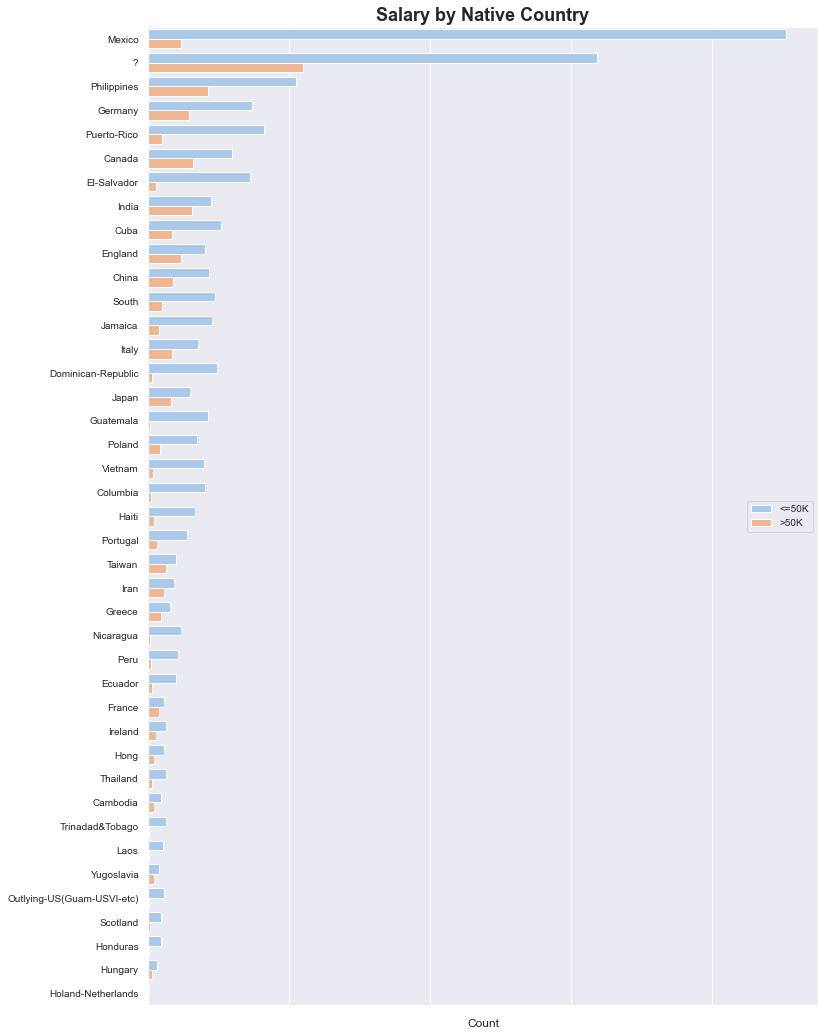

In [31]:
# Salary distribution by country
# Excludes United States
dataset_nous_class = dataset_nc_class.loc[dataset_nc_class['nc'] != 'United-States']

plt.figure(figsize=(12,18))
cl7 = sns.countplot(y=dataset_nous_class['nc'], hue = dataset_nous_class['cl'], palette='pastel', order = dataset_nous_class['nc'].value_counts(ascending=False).index)
cl7.set_xticklabels(sd3.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Salary by Native Country', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

An extreme proportion of country data is recorded as United States, so the U.S. data was seperated from the rest as to not dwarf the remaining countries when visualizing the data. For all countries, lower income class makes up the majority of the population. The state of a country's general income proportion could be determined calculating the ratio of lower income class to higher income class. Examples of higher salary countries are India, Taiwan, Iran, and Greece. Examples of lower salary countries include Columbia, Vietnam, Nicaragua, and Guatemala. 